<a href="https://colab.research.google.com/github/kiakass/tensorflow/blob/master/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# package, module 를 import
import numpy as np
import pandas as pd
import tensorflow as tf

import keras
from tensorflow import keras

#from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.optimizers import RMSprop

#data
from sklearn.datasets import fetch_california_housing

In [7]:
df = fetch_california_housing()
X1 = pd.DataFrame(df.data, columns=df.feature_names)
X2 = pd.DataFrame(df.target, columns=['Sales'])
housing=pd.concat([X1,X2], axis=1) #.drop(['Education'], axis=1)
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Sales
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
# 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split 
X = housing.iloc[:, 0:4]
y = housing.iloc[:, 8]

In [10]:
# 3. 훈련/검증용 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1 )

In [38]:
rmsprop = RMSprop(lr=0.01)
model = Sequential()
model.add(Dense(1,input_dim=4))

#model compile
model.compile(loss='mse', optimizer='adam') # adam , rmsprop
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [39]:
batch_size = 1000
epochs = 1000


# Early Stop : patience #n 회 이상 val_loss 가 변화가 없으면 중단
es = EarlyStopping(monitor='val_loss', patience=20, min_delta=0.001)

# model fit
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_train, Y_train),
                    callbacks=[es]) #validation_split=0.2 

Epoch 1/1000
15/15 [==============================] - 0s 10ms/step - loss: 242.5984 - val_loss: 232.1575
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 223.8350 - val_loss: 213.9341
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 206.1489 - val_loss: 196.7474
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 189.4727 - val_loss: 180.7185
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 173.9474 - val_loss: 165.7216
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 159.3725 - val_loss: 151.7984
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 145.8881 - val_loss: 138.7534
Epoch 8/1000
15/15 [==============================] - 0s 4ms/step - loss: 133.2368 - val_loss: 126.7191
Epoch 9/1000
15/15 [==============================] - 0s 4ms/step - loss: 121.6057 - val_loss: 115.4514
Epoch 10/1000
15/15 [==============================] - 0s 4ms/s

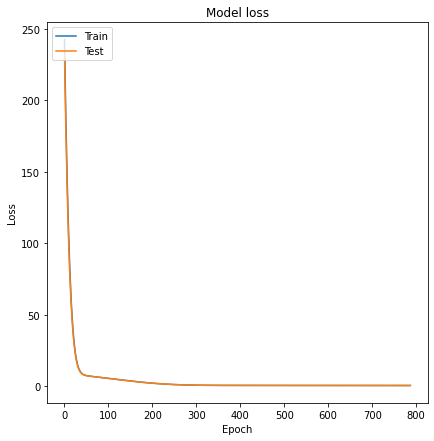

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(0,1.4)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [43]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X_test,  Y_test, batch_size=1000 ,verbose=2)


7/7 - 0s - loss: 0.6233
